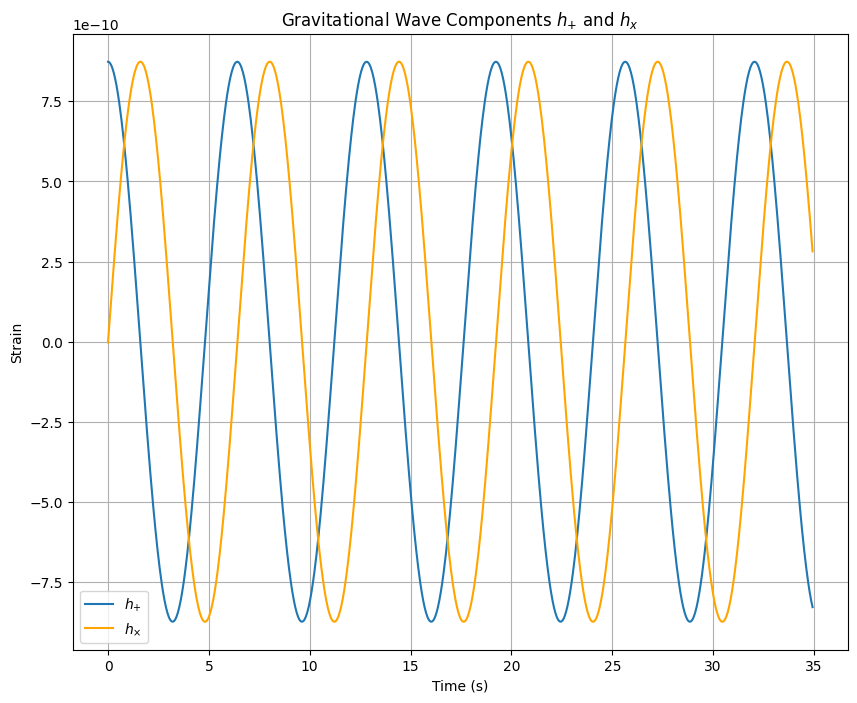

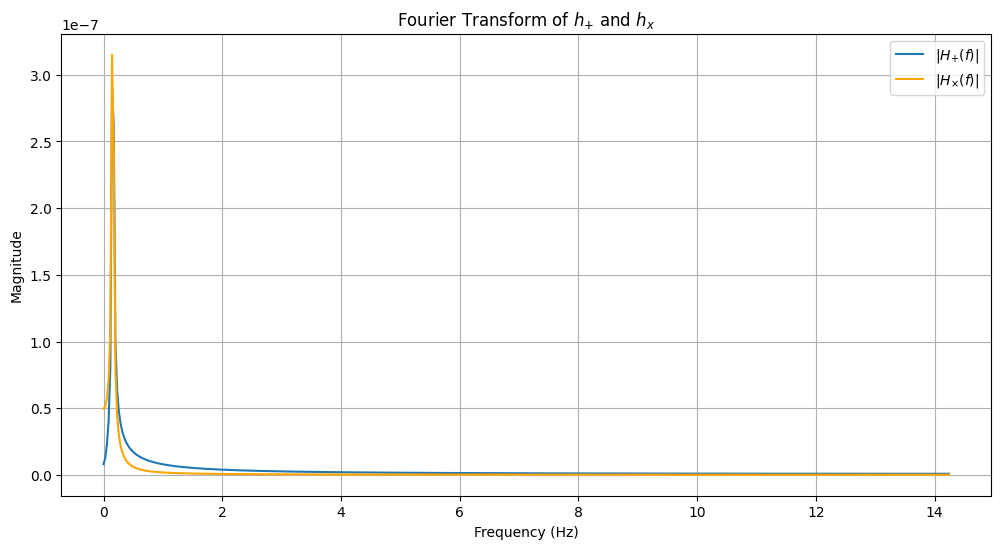

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define constants
G = 6.67430e-11  # gravitational constant in m^3 kg^-1 s^-2
c = 3.0e8        # speed of light in m/s
omega = 0.98      # angular frequency in rad/s (example value)

# Define the source terms (example values)
def Q11(t):
    return np.sin(omega * t)

def Q12(t):
    return np.cos(omega * t)

def t00_LL(t):
    return np.sin(omega * t)

def E11(t):
    return np.cos(omega * t)

def E12(t):
    return np.sin(omega * t)

# Define the functions for h+ and h×
def h_plus(t):
    # Slice t00_LL(t) and E11(t) to match the shape of np.diff(Q11(t),2)
    return (8 * np.pi * G / omega**2) * (np.diff(Q11(t), 2) + (1 / c**2) * t00_LL(t)[:-2] + 0.5 * E11(t)[:-2])

def h_cross(t):
    # Slice t00_LL(t) and E12(t) to match the shape of np.diff(Q12(t),2)
    return (8 * np.pi * G / omega**2) * (np.diff(Q12(t), 2) + (1 / c**2) * t00_LL(t)[:-2] + 0.5 * E12(t)[:-2])

# Generate time values
t = np.linspace(0, 35, 1000)  # from 0 to 35 seconds with 1000 points

# Calculate h+ and h× values
h_plus_vals = h_plus(t)
h_cross_vals = h_cross(t)

# Compute FFT
h_plus_fft = np.fft.fft(h_plus_vals)
h_cross_fft = np.fft.fft(h_cross_vals)

# Frequency values for the FFT
freqs = np.fft.fftfreq(len(t[:-2]), t[1] - t[0])

# Plot the results on a single graph
plt.figure(figsize=(10, 8))
plt.plot(t[:-2], h_plus_vals, label=r'$h_{+}$')
plt.plot(t[:-2], h_cross_vals, label=r'$h_{\times}$', color='orange')
plt.title('Gravitational Wave Components $h_{+}$ and $h_{x}$')
plt.xlabel('Time (s)')
plt.ylabel('Strain')
plt.legend()
plt.grid(True)
plt.show()

# Plot the FFT results on a single graph
plt.figure(figsize=(12, 6))
plt.plot(freqs[:len(freqs)//2], np.abs(h_plus_fft[:len(freqs)//2]), label=r'$|H_{+}(f)|$')
plt.plot(freqs[:len(freqs)//2], np.abs(h_cross_fft[:len(freqs)//2]), label=r'$|H_{\times}(f)|$', color='orange')
plt.title('Fourier Transform of $h_{+}$ and $h_{x}$')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.legend()
plt.grid(True)
plt.show()
